In [7]:
!pip install pandas numpy scipy matplotlib


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## Cùng xem ma trận tương quan của cả 10 chỉ số 


=== Correlation Matrix for All 10 Stocks ===
          FPT       CMG       CMT       DGW       ELC       SAM       VGC  \
FPT  1.000000  0.929770  0.626890  0.853501  0.928041  0.307373  0.710859   
CMG  0.929770  1.000000  0.573535  0.739432  0.848697  0.425462  0.608072   
CMT  0.626890  0.573535  1.000000  0.631592  0.744278  0.091953  0.693632   
DGW  0.853501  0.739432  0.631592  1.000000  0.902581  0.426556  0.901525   
ELC  0.928041  0.848697  0.744278  0.902581  1.000000  0.296005  0.859710   
SAM  0.307373  0.425462  0.091953  0.426556  0.296005  1.000000  0.391078   
VGC  0.710859  0.608072  0.693632  0.901525  0.859710  0.391078  1.000000   
VGI  0.910037  0.956787  0.500617  0.649951  0.768136  0.302202  0.484458   
VTL -0.793203 -0.863747 -0.392468 -0.507174 -0.637687 -0.252195 -0.350353   
VTP  0.927876  0.826666  0.777659  0.893762  0.951746  0.278768  0.837541   

          VGI       VTL       VTP  
FPT  0.910037 -0.793203  0.927876  
CMG  0.956787 -0.863747  0.826666 

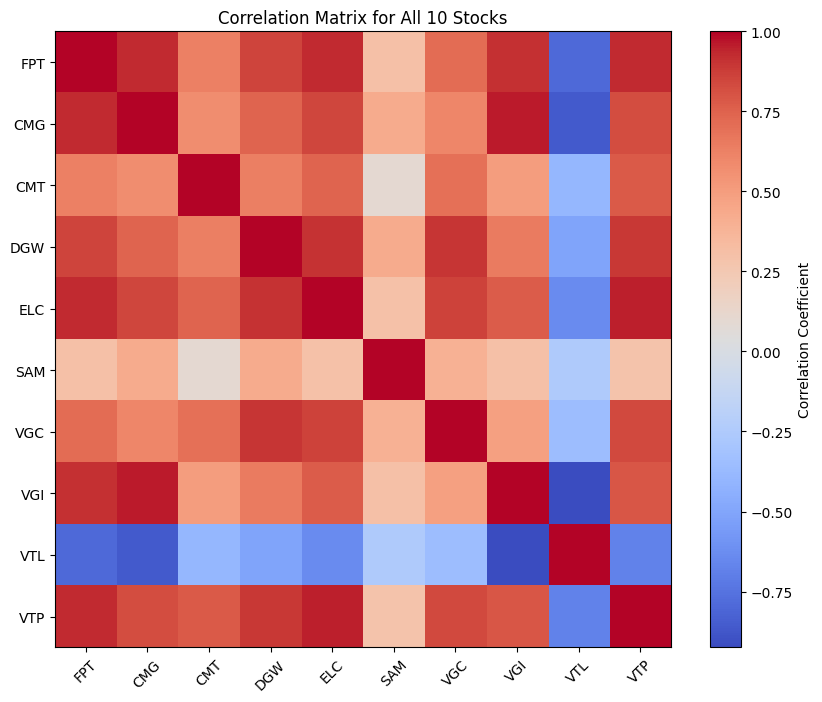

In [7]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Đọc và xử lý dữ liệu từ các file của 10 công ty
def process_stock_data(df):
    df['time'] = pd.to_datetime(df['time'])
    df.set_index('time', inplace=True)
    return df

# Load dữ liệu của cả 10 công ty
fpt_df = process_stock_data(pd.read_csv('../data/raw/1_FPT_stock_data.csv'))
cmg_df = process_stock_data(pd.read_csv('../data/raw/2_CMG_stock_data.csv'))
cmt_df = process_stock_data(pd.read_csv('../data/raw/3_CMT_stock_data.csv'))
dgw_df = process_stock_data(pd.read_csv('../data/raw/4_DGW_stock_data.csv'))
elc_df = process_stock_data(pd.read_csv('../data/raw/5_ELC_stock_data.csv'))
sam_df = process_stock_data(pd.read_csv('../data/raw/6_SAM_stock_data.csv'))
vgc_df = process_stock_data(pd.read_csv('../data/raw/VGC_stock_data.csv'))
vgi_df = process_stock_data(pd.read_csv('../data/raw/VGI_stock_data.csv'))
vtl_df = process_stock_data(pd.read_csv('../data/raw/VTL_stock_data.csv'))
vtp_df = process_stock_data(pd.read_csv('../data/raw/VTP_stock_data.csv'))

# Tạo DataFrame hợp nhất với giá đóng cửa của tất cả các cổ phiếu
merged_df = pd.DataFrame({
    'FPT': fpt_df['close'],
    'CMG': cmg_df['close'],
    'CMT': cmt_df['close'],
    'DGW': dgw_df['close'],
    'ELC': elc_df['close'],
    'SAM': sam_df['close'],
    'VGC': vgc_df['close'],
    'VGI': vgi_df['close'],
    'VTL': vtl_df['close'],
    'VTP': vtp_df['close']
}).dropna()

# Tính toán ma trận tương quan cho tất cả 10 cổ phiếu
correlation_matrix = merged_df.corr()

# Hiển thị ma trận tương quan
print("\n=== Correlation Matrix for All 10 Stocks ===")
print(correlation_matrix)

# Vẽ biểu đồ ma trận tương quan
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlation Coefficient')
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.index)
plt.title("Correlation Matrix for All 10 Stocks")
plt.show()


## 1.2 Nhận xét

### **Phân tích ma trận tương quan của 10 cổ phiếu**

---

### **1. Tóm tắt các mức tương quan cao nhất và thấp nhất**

| **Cặp cổ phiếu**         | **Tương quan** | **Nhận xét** |
|--------------------------|-----------------|---------------|
| **CMG - VGI**            | **0.957**       | Mức tương quan rất cao, cho thấy hai cổ phiếu **thường di chuyển cùng chiều**. Đây có thể là cặp tiềm năng cho **pair trading**. |
| **ELC - VTP**            | **0.952**       | Tương quan mạnh, cho thấy hai cổ phiếu có xu hướng **cùng biến động**, thích hợp cho chiến lược pair trading. |
| **FPT - CMG**            | **0.930**       | Hai cổ phiếu công nghệ lớn, thường **tăng/giảm cùng nhau**. Cặp này có thể tận dụng cho giao dịch cặp với độ an toàn cao. |
| **VGI - VTL**            | **-0.925**      | Mức tương quan âm rất mạnh. Khi VGI tăng thì VTL giảm và ngược lại. Đây là cặp **tiềm năng cho chiến lược trading ngược chiều**. |
| **VTL - FPT**            | **-0.793**      | Mức tương quan âm khá cao. Có thể khai thác chiến lược dựa trên sự **phân kỳ** giữa hai cổ phiếu này. |

---

### **2. Phân tích chi tiết theo nhóm cổ phiếu**

#### **Nhóm cổ phiếu có tương quan cao (Cùng chiều)**

- **FPT - CMG (0.930)**: 
  - Đây là hai công ty lớn trong ngành công nghệ Việt Nam. Mức tương quan cao cho thấy cả hai thường bị ảnh hưởng bởi các yếu tố thị trường chung.
  - **Chiến lược**: **Pair trading**, tận dụng chênh lệch giá khi có sự khác biệt lớn trong biến động của hai cổ phiếu.

- **ELC - VTP (0.952)**:
  - Cả hai cổ phiếu đều liên quan đến hạ tầng và công nghệ. Khi một trong hai cổ phiếu thay đổi, cổ phiếu còn lại có xu hướng thay đổi tương tự.
  - **Chiến lược**: Pair trading với tỷ lệ hedge thấp, vì tương quan gần như tuyệt đối.

- **CMG - VGI (0.957)**:
  - Tương quan mạnh mẽ giữa hai công ty công nghệ. Khi giá của một cổ phiếu tăng hoặc giảm, cổ phiếu kia có xu hướng biến động tương tự.
  - **Chiến lược**: Pair trading để tận dụng sự khác biệt về tốc độ phản ứng giá.

#### **Nhóm cổ phiếu có tương quan âm (Ngược chiều)**

- **VGI - VTL (-0.925)**:
  - Tương quan âm rất mạnh cho thấy **khi VGI tăng giá, VTL có xu hướng giảm giá** và ngược lại.
  - **Chiến lược**: Giao dịch ngược chiều (reversal trading). Mua một cổ phiếu và bán cổ phiếu kia khi có tín hiệu phân kỳ.

- **FPT - VTL (-0.793)**:
  - Khi FPT tăng thì VTL giảm, và ngược lại. Có thể khai thác sự khác biệt này cho chiến lược giao dịch.
  - **Chiến lược**: Tận dụng sự phân kỳ để tìm cơ hội kiếm lợi nhuận từ chênh lệch giá.

---

### **3. Đề xuất chiến lược giao dịch dựa trên kết quả phân tích**

| **Cặp cổ phiếu** | **Chiến lược đề xuất** | **Giải thích** |
|------------------|-----------------------|----------------|
| **CMG - VGI**    | Pair Trading         | Tận dụng tương quan rất cao (0.957) để mua/bán dựa trên chênh lệch giá. |
| **ELC - VTP**    | Pair Trading         | Mức tương quan gần như tuyệt đối (0.952), phù hợp cho chiến lược giao dịch cặp an toàn. |
| **VGI - VTL**    | Trading Reversal     | Tương quan âm mạnh (-0.925), tận dụng biến động ngược chiều. |
| **FPT - CMG**    | Pair Trading         | Tương quan cao (0.930), giúp tối ưu hóa chiến lược giao dịch cặp. |
| **FPT - VTL**    | Trading Reversal     | Tương quan âm (-0.793), có thể khai thác sự phân kỳ cho giao dịch đảo chiều. |

---

### **4. Kết luận**
- **Cổ phiếu cùng chiều**: Tận dụng chiến lược pair trading cho các cặp có tương quan cao để giảm thiểu rủi ro.
- **Cổ phiếu ngược chiều**: Khai thác sự phân kỳ cho chiến lược giao dịch đảo chiều, giúp tối ưu hóa lợi nhuận khi thị trường biến động.


## Dựa vào kết quả tương quan 10 chỉ số => sau đó ta có thể phân tích chi tiết từng chỉ số theo cặp